In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path('/content/drive/Shareddrives/KN Solvro/03. Projekty/Wakacyjne Wyzwanie 2025/ML/notebooki/1_Przetwarzanie i wizualizacja danych')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Wnioski z poprzedniego zadania
W zeszłym tygodniu naszym zadaniem było przetwarzanie oraz wizualizacja danych pasażerów titanica pod kątem tego, czy udało im się przeżyć, czy nie. Na podstawie przeprowadzonej przez nas analizy można wysunąć następujące wnioski:
1. Nie wszystkie z dostępnych danych mają wpływ na rezultat
2. Ważne jest, aby przy wizualizacji danych pozamieniać cechy kategorialne na numeryczne

# DummyClassifier
Na początku warto sprawdzić, jak z zadaniem radzi sobie DummyClassifier, żeby na podstawie jego wynników ocenić skuteczność innych modeli.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
titanic_data = pd.read_csv('/content/titanic.csv')
titanic_data = titanic_data.dropna(subset=['Survived', 'Age', 'Sex'])
titanic_data['Sex']= titanic_data['Sex'].map({'male': 0, 'female': 1})
X = titanic_data[['Age', 'Sex']]
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
score = dummy_clf.score(X_test, y_test)

print("Predykcje:", y_pred)
print("Dokładność DummyClassifier:", score)

Predykcje: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Dokładność DummyClassifier: 0.5944055944055944


# Drzewo decyzyjne
Wybrałam ten model na samym początku, ponieważ nie mam doświadczenia z uczeniem maszynowym. Jest łatwy w interpretacji, przez co nie będzie mi trudno stwierdzić czy wynik jest satysfakcjonujący.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("titanic.csv")
df = df[["Pclass", "Sex", "Age", "Fare", "Survived"]].dropna()
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
X = df.drop("Survived", axis=1)
y = df["Survived"]
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=10)

print("Dokładności dla każdego folda:", scores)
print("Średnia dokładność:", scores.mean())

from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'criterion': ["gini", "entropy", "log_loss"], 'splitter': ["best", "random"], 'max_features': ["sqrt", "log2"]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters)
clf.fit(X, y)



Dokładności dla każdego folda: [0.71875    0.79365079 0.71428571 0.79365079 0.80952381 0.79365079
 0.74603175 0.74603175 0.87301587 0.80952381]
Średnia dokładność: 0.779811507936508


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

Sprawdzam jaka jest skuteczność modelu i jakie hiperparametry najlepiej sprawdzą się w danej sytuacji.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
tree = DecisionTreeClassifier(criterion= 'log_loss', max_features= 'sqrt', splitter= 'best')
df = pd.read_csv("titanic.csv")
df = df[["Pclass", "Sex", "Age", "Fare", "Survived"]].dropna()
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
X = df.drop("Survived", axis=1)
y = df["Survived"]
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=10)

print("Dokładności dla każdego folda:", scores)
print("Średnia dokładność:", scores.mean())

Dokładności dla każdego folda: [0.71875    0.79365079 0.71428571 0.79365079 0.80952381 0.79365079
 0.74603175 0.74603175 0.87301587 0.80952381]
Średnia dokładność: 0.779811507936508


Sprawdzam skuteczność modelu dzięki metryce recall, ponieważ pokazuje ona ile z wszystkich przypadków pasażerów, którym udało się przeżyc, zostało poprawnie wykrytych

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")



Recall: 0.71


# KNN        
Drugim modelem, który został przeze mnie wybrany jest KNN. Postanowiłam go zastosować, ponieważ także nie jest zbytnio skomplikowany, co ułatwiło mi pracę.                                     

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
df = pd.read_csv("titanic.csv")
features = ["Pclass", "Sex", "Age", "Fare"]
df = df[features + ["Survived"]]
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
imputer = SimpleImputer(strategy="median")
df[["Age", "Fare"]] = imputer.fit_transform(df[["Age", "Fare"]])
X = df[features]
y = df["Survived"]
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10)

print("Dokładności dla każdego folda:", scores)
print("Średnia dokładność:", scores.mean())


parameters = {'weights': ["uniform", "distance"], 'algorithm': ["auto", "ball_tree", "kd_tree", "brute"]}
KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, parameters)
clf.fit(X, y)

Dokładności dla każdego folda: [0.64444444 0.64044944 0.6741573  0.75280899 0.71910112 0.6741573
 0.78651685 0.75280899 0.71910112 0.70786517]
Średnia dokładność: 0.7071410736579276


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

Sprawdzam jaka jest skuteczność modelu i jakie hiperparametry najlepiej sprawdzą się w tym przypadku.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
knn = KNeighborsClassifier(weights= "uniform", algorithm= "brute" )
df = pd.read_csv("titanic.csv")
features = ["Pclass", "Sex", "Age", "Fare"]
df = df[features + ["Survived"]]
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
imputer = SimpleImputer(strategy="median")
df[["Age", "Fare"]] = imputer.fit_transform(df[["Age", "Fare"]])
X = df[features]
y = df["Survived"]
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10)

print("Dokładności dla każdego folda:", scores)
print("Średnia dokładność:", scores.mean())

Dokładności dla każdego folda: [0.64444444 0.64044944 0.6741573  0.75280899 0.71910112 0.6741573
 0.78651685 0.75280899 0.71910112 0.70786517]
Średnia dokładność: 0.7071410736579276


Korzystam z metody najbliższych sąsiadów, ponieważ dla odmiany, chcę sobie zwizualizować ilość poprawnie wykrytych przypadków.

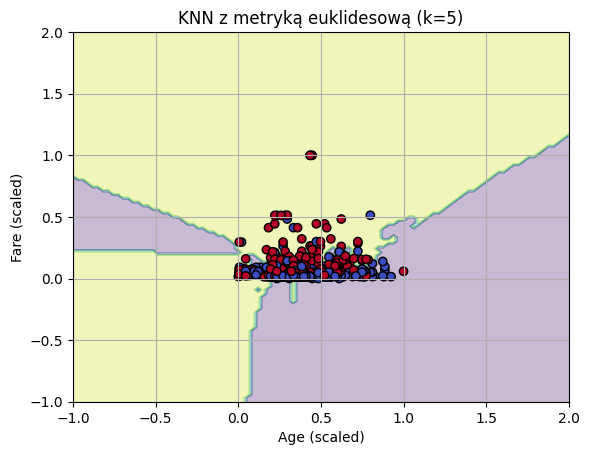

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
X = df[["Age", "Fare"]].dropna()
y = df.loc[X.index, "Survived"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_scaled, y)
disp = DecisionBoundaryDisplay.from_estimator(knn, X_scaled, response_method="predict", alpha=0.3)
disp.ax_.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k')
disp.ax_.set_title("KNN z metryką euklidesową (k=5)")
disp.ax_.set_xlabel("Age (scaled)")
disp.ax_.set_ylabel("Fare (scaled)")
plt.grid(True)
plt.show()


# Podsumowanie
1. Istotny jest wybór modelu ponieważ nie każdy wykrywa właściwe przypadki z tą samą dokładnością.
2. Ważne jest, aby nie doprowadzić do przecieku danych, ponieważ ta sytuacja niszczy całą ideę wytrenowanego modelu.
3. Warto zwracać uwagę na wykorzystywany sposób określający skuteczność w zależności od tego, jaki chcemy otrzymać wynik.